In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ipywidgets import interact, fixed
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.preprocessing import LabelEncoder

# CART

### 1. Clasificacion

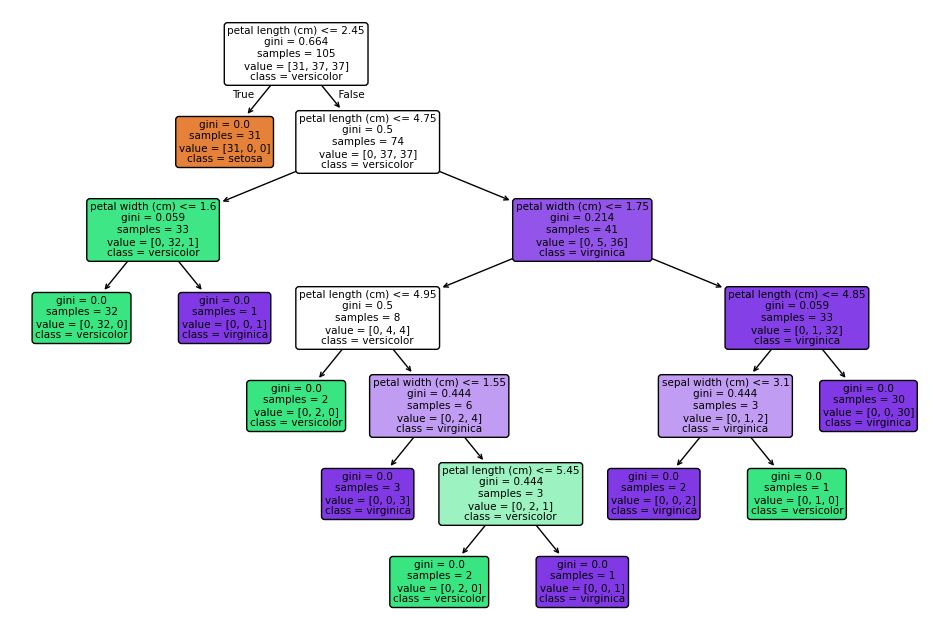

Importancia de las características: [0.         0.01911002 0.89326355 0.08762643]


In [ ]:

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42, criterion="gini", splitter="best")
clf.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

print("Importancia de las características:", clf.feature_importances_)

Las importancias de las características representan la contribución de cada variable en la toma de decisiones del modelo. Cuanto mayor sea la importancia, mayor es el impacto de esa variable en la construcción del árbol.


### 2. Regresión

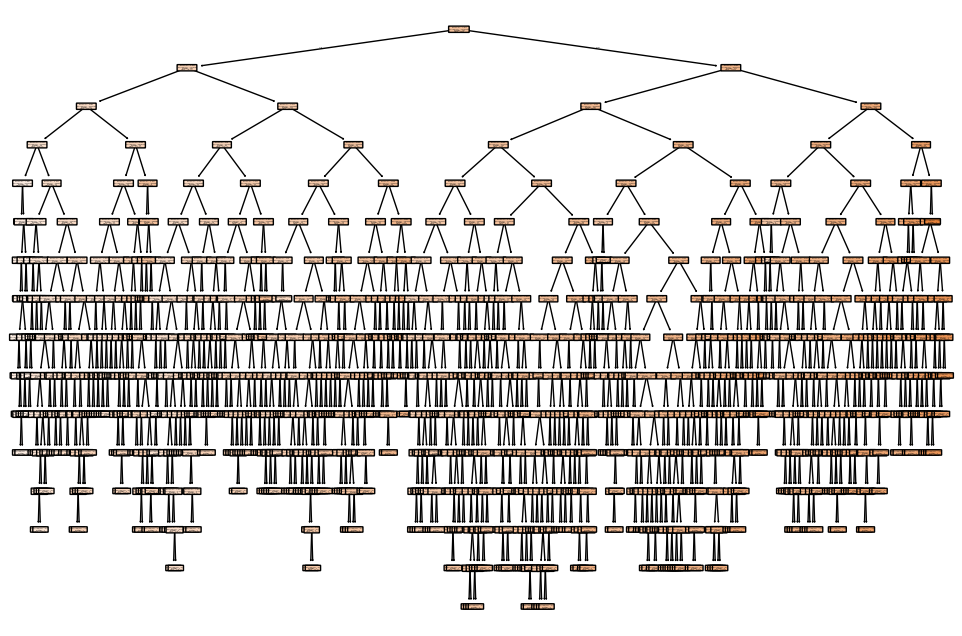

Importancia de las características: [0.18374278 0.01551946 0.65997968 0.14075808]


In [ ]:
X, y = make_regression(n_samples=1000, n_features=4, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(regressor, filled=True, feature_names=[f'Feature {i+1}' for i in range(X.shape[1])], rounded=True)

plt.show()

print("Importancia de las características:", regressor.feature_importances_)

Similar al modelo de clasificación, las importancias en regresión representan la cantidad de variabilidad explicada por cada característica en la predicción de los valores continuos de 'y'. Cuanto mayor sea la importancia, más relevante será la característica en la predicción.

### 3. ¿Qué variables del dataset están influyendo más en las decisiones del árbol y por qué el algoritmo determinó dichas variables como las mas importantes?


In [8]:
# Para el clasificador (iris)
print("Variables más importantes para clasificación:", iris.feature_names)
print("Importancia de las variables de clasificación:", clf.feature_importances_)

# Para el regresor (regresión)
print("Variables más importantes para regresión:", [f'Feature {i+1}' for i in range(X.shape[1])])
print("Importancia de las variables de regresión:", regressor.feature_importances_)

Variables más importantes para clasificación: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Importancia de las variables de clasificación: [0.         0.01911002 0.89326355 0.08762643]
Variables más importantes para regresión: ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
Importancia de las variables de regresión: [0.18374278 0.01551946 0.65997968 0.14075808]


Las variables que tienen la mayor importancia en los modelos son aquellas que afectan más directamente la toma de decisiones, es decir, aquellas que más contribuyen a reducir la "impureza" del árbol (clasificación) o a la variabilidad residual (regresión).

### 4. Diferencias entre árboles de clasificación y regresión

**Árboles de clasificación:**
- Clasifican ejemplos en categorías discretas.
- La impureza se mide generalmente mediante el índice de Gini o la entropía.
- El objetivo es minimizar la impureza en cada nodo.

**Árboles de regresión:**
- Predicen valores continuos.
- La impureza se mide a través de la varianza o el error cuadrático medio (MSE).
- El objetivo es minimizar la varianza en cada nodo.

En cuanto a la estructura, los árboles de clasificación usan etiquetas de clase en las hojas, mientras que los árboles de regresión usan valores numéricos promedio en las hojas.

# KNN

# SVM

### Pregunta 1

In [ ]:


X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Función que se llama con distintos parametros en interact para hacer dinámico el gráfico.
def build_graphic(kernel='rbf', C=1.0, gamma=1.0):
    model = SVC(kernel=kernel, C=C, gamma=gamma)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"SVM con kernel={kernel}, C={C}, gamma={gamma}\nAccuracy en prueba: {acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

interact(
    build_graphic,
    kernel=['linear', 'poly', 'rbf', 'sigmoid'],
    C=(0.1, 50, 0.1),
    gamma=(0.1, 50, 0.1)
)


### Pregunta 2

In [ ]:
from sklearn.metrics import f1_score

C_values = [0.001, 0.003, 0.010, 0.032, 0.100, 0.316, 1.000, 3.162, 10.000, 31.622]
gamma_values = [0.001, 0.003, 0.010, 0.032, 0.100, 0.316, 1.000, 3.162, 10.000, 31.622]

best_f1 = 0
best_params = {'C': None, 'gamma': None}
results = []

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        f1 = f1_score(y_test, y_pred)
        results.append({'C': C, 'gamma': gamma, 'f1_score': f1})

        if f1 > best_f1:
            best_f1 = f1
            best_params = {'C': C, 'gamma': gamma}

# Mostrar mejores hiperparámetros
print("\n" + "="*40)
print("MEJORES HIPERPARÁMETROS")
print("="*40)
print(f"C = {best_params['C']}, gamma = {best_params['gamma']}")
print(f"F1-score = {best_f1:.4f}")
print("="*40)

# Mostrar todos los resultados
print("\nResultados de todas las combinaciones:")
for result in results:
    print(f"C = {result['C']}, gamma = {result['gamma']}, F1-score = {result['f1_score']:.4f}")


### Pregunta 3

In [ ]:


f1_matrix = np.zeros((len(C_values), len(gamma_values)))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        # Buscar el F1-score correspondiente a esta combinación
        f1 = next(result['f1_score'] for result in results if result['C'] == C and result['gamma'] == gamma)
        f1_matrix[i, j] = f1

f1_df = pd.DataFrame(f1_matrix, index=C_values, columns=gamma_values)

plt.figure(figsize=(12, 8))
sns.heatmap(
    f1_df, annot=True, fmt=".3f", cmap="magma", cbar_kws={'label': 'F1-score'}
)
plt.title("Heatmap de F1-score para combinaciones de C y gamma", fontsize=14)
plt.xlabel("Gamma")
plt.ylabel("C")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### Pregunta 4

¿Existen "zonas óptimas" en lugar de valores específicos de hiperparámetros que producen un buen rendimiento? Si la respues es positiva indique dicha zona óptima

Si, con valores de 0.3 a 1 de gamma y de 0.3 a 32 de C se obtienen buenos resultados en general; sin embargo "la mejor zona" se forma en una especie de recta que se forma en donde si aumenta gamma y C en la misma proporción de acuerdo a los datos dados, F1-Score obtiene los máximos valores.

(La recta que se indica puede notarse al enfocarse en los recuadros con colores muy claros)

### Pregunta 5

C se ocupa de generalizar el modelo de la siguiente forma: Al calcular los margenes máximos, si no modificamos gamma, el modelo debe tomar 2 puntos que serán los soportes para trazar el hiperplano separador. Al aumentar C, se ignorarán mayor cantidad de puntos para elegir estos posibles puntos de soporte y generar una separabilidad de clases efectivas para trazar el hiperplano. Si C es muy bajo (valores cercanos a 0) simplemente considerara los 2 puntos que maximizan un margen entre las clases, induciendo en general a un modelo contruido con muy poca información, y generando un hiperplano poco representativo (UNDERFITTING). ahora si C es muy grande, el modelo podría caer en un Overfitting, dado que el hiperplano podría ajustarce en funcion de datos especificos del entrenamiento, ya que penalizara todos los que considere "mal clasificados" y generara una separabilidad ficticia (Esto último es especialmente cierto en datos con mucho ruido)

Gamma se encarga de generar puntos promedios entre las clases que sirvan como soporte (en vez de utilizar solo 1 para cada clase), entonces, gamma con valores muy bajos obliga al modelo a solo usar 1 punto por clase, lo que en general no da los mejores resultados, pues puedes existir outlayers que estan muchos mas cerca del posible hiperplano a generar, y puede generar underfitting y malos resultados que no son representativos para la muestra.

Con valores demasiado alto, el modelo usa todos los puntos por clase para trazar el hiperplano, lo que tampoco es recomendable pues el hiperplano y por ende las predicciones tenderán a otorgar resultados asociados a las clases con puntos con valores más altos (pues inciden más en este "promedio")

# ENSEMBLE

### 1. Cuál es la principal diferencia entre los modelos de bagging y boosting? ¿Que ventajas y desventajas presentan?

**La principal diferencia es que los modelos de Bagging no inyectan diversidad a nivel de filas es decir no hay un mecanismo que deliberadamente dé más importancia a ciertas filas sobre otras, en cambio los modelos de Boosting si lo hacen, los algoritmos modifican activamente la importancia de cada observación en cada iteración o en otras palabras las observaciones mal clasificadas reciben más peso en la siguiente iteración.**

**Boosting:** \\
Ventajas:
Alta precision y rendimiento, modelos versatiles, reduccion sistematica del sesgo.

Desventajas: Sensisbilidad al ruido, Computacionalmente intensivos, y tendencia al sobreajuste, No son paralelizables, mas sensibles a una correcta configuracion de hiperparametros

**Bagging:** \\
Ventajas: Efectivos para controlar el sobreajuste, robustez al ruido, resultados mas estables, son paralelizables

Desventajas: Menor interpretabilidad al haber muchos modelos en accion, uso intensivo de memoria y recursos computacionales, limitada capacidad para reducir sesgo.

### 2. Usando el dataset `weather-typeclassification` sin limpieza de datos, entrene un modelo de Random Forest, adaBoost y gradientBoost. Imprima las metricas correspondientes y mida el tiempo de ejecución en cada caso.

In [ ]:
csv_path = "weather_classification_data.csv"
df = pd.read_csv(csv_path)
print(df.head())

In [ ]:
def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test, weather_types):
    # Start timing
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate execution time
    execution_time = time.time() - start_time

    # Print results
    print(f"\n{'-'*50}")
    print(f"{model_name} Results:")
    print(f"{'-'*50}")
    print(f"Execution Time: {execution_time:.2f} seconds")

    # Overall accuracy
    print(f"\nOverall Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # Metrics per weather type
    print("\nMetrics per Weather Type:")
    print(f"{'Weather Type':<20} {'Precision':<12} {'Recall':<12} {'F1 Score':<12}")
    print("-" * 56)

    for idx, weather_type in enumerate(weather_types):
        precision = precision_score(y_test == idx, y_pred == idx)
        recall = recall_score(y_test == idx, y_pred == idx)
        f1 = f1_score(y_test == idx, y_pred == idx)

        print(f"{weather_type:<20} {precision:<12.4f} {recall:<12.4f} {f1:<12.4f}")

    return model, execution_time

In [ ]:
print(f"Dataset size with outliers: {len(df)} rows")

# Assuming 'df' is your dataframe and 'Weather Type' is your target
# First, separate features and target
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Cloud Cover', 'Season', 'Location']

# Iterate through categorical columns and encode them
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])


# Encode target variable to get unique classes
y = label_encoder.fit_transform(y)
weather_types = label_encoder.classes_

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train and evaluate each model
print("\nTraining and evaluating models...")

rf_model, rf_time = train_and_evaluate(
    rf_model, "Random Forest", X_train, X_test, y_train, y_test, weather_types
)

ada_model, ada_time = train_and_evaluate(
    ada_model, "AdaBoost", X_train, X_test, y_train, y_test, weather_types
)

gb_model, gb_time = train_and_evaluate(
    gb_model, "Gradient Boosting", X_train, X_test, y_train, y_test, weather_types
)

### 3. ahora realice una limpieza de outliers quitando los percentiles inferiores al 5% ysuperiores al 95% de los datos. y reentrena con estos nuevos datos. Imprima las metricas correspondientes y mida el tiempo de ejecución en cada caso.

In [ ]:
# Get numeric columns (excluding 'Weather Type')
numeric_columns = df.select_dtypes(include=[np.number]).columns
#numeric_columns = numeric_columns[~numeric_columns.isin(['Weather Type'])]

print("Original dataset size:", len(df))
print("Numeric columns for outlier removal:", numeric_columns.tolist())

# Remove outliers for each numeric column
df_clean = df.copy()
for column in numeric_columns:
    Q1 = df[column].quantile(0.05)  # 5th percentile
    Q3 = df[column].quantile(0.95)  # 95th percentile
    mask = (df[column] >= Q1) & (df[column] <= Q3)
    df_clean = df_clean[mask]

print("Dataset size after removing outliers:", len(df_clean))

# Assuming 'df' is your dataframe and 'Weather Type' is your target
# First, separate features and target
X = df_clean.drop('Weather Type', axis=1)
y = df_clean['Weather Type']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Cloud Cover', 'Season', 'Location']

# Iterate through categorical columns and encode them
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])


# Encode target variable to get unique classes
y = label_encoder.fit_transform(y)
weather_types = label_encoder.classes_

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
ada_model2 = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train and evaluate each model
print("\nTraining and evaluating models...")

rf_model2, rf_time2 = train_and_evaluate(
    rf_model2, "Random Forest", X_train, X_test, y_train, y_test, weather_types
)

ada_model2, ada_time2 = train_and_evaluate(
    ada_model2, "AdaBoost", X_train, X_test, y_train, y_test, weather_types
)

gb_model2, gb_time2 = train_and_evaluate(
    gb_model2, "Gradient Boosting", X_train, X_test, y_train, y_test, weather_types
)


### 4. Cómo influye la eliminación de los outliers en el rendimiento de los modelos? Explica por qué algunos modelos pueden beneficiarse más que otros de la limpieza de outliers.

In [ ]:

# Print execution time comparison
print("\nExecution Time Comparison:")
print(f"{'Model':<20} {'Time (seconds)':<15}")
print("-" * 35)
print(f"{'Random Forest':<20} {rf_time:<15.2f}")
print(f"{'AdaBoost':<20} {ada_time:<15.2f}")
print(f"{'Gradient Boosting':<20} {gb_time:<15.2f}")

# Print execution time comparison
print("\nExecution Time Comparison:")
print(f"{'Model':<20} {'Time (seconds)':<15}")
print("-" * 35)
print(f"{'Random Forest':<20} {rf_time2:<15.2f}")
print(f"{'AdaBoost':<20} {ada_time2:<15.2f}")
print(f"{'Gradient Boosting':<20} {gb_time2:<15.2f}")

En terminos de accuracy el modelo de gradient boosting es el mas beneficiado por la eliminacion de los outliers, esto es por que son modelos sensibles al ruido y tienden al sobreajuste mas rapido que otros modelos. Tambien se nota la mayor mejora en terminos de tiempo de ejecucion.\ El modelo de Random forest se beneficia mayormente en la mejora de los tiempos de ejecucion por una convergencia mas rapida pero no asi en accuracy ya que se practicamente inalterado por su robustez al ruido.
El modelo de adaboost no presenta mejoras ni en tiempo de ejecucion ni accuracy y puede deberse a que privamos al modelo de informacion valiosa sobre casos extremos, ya que los outliers pueden ser cruciales para definir los limites de decision de ciertas regiones del espacio de atributos y esto altera la distribucion natual de los pesos, afecta el balance natural del algoritmo y empeora la convergencia de este.

### 5. Cuál cree que es el mejor modelo para estos datos ? ¿Por qué?

Creo que el mejor modelo es Random forest, porque obtiene un accuracy excelente al menor tiempo de ejecucion y ademas es paralelizable lo que lo hace el mas eficiente. Puede ser porque el conjunto de datos presenta alta varianza y poco sesgo lo que es predilecto para este modelo. Tambien puede ser porque de fabrica el conjunto de datos presenta una buena variabilidad.